# Machine Learning in Python - Project 1

Due Friday, Feb 28th by 4 pm.

*Hariaksh Pandya - S2692608*

## Setup

*Installing packages and required libraries*

In [161]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

In [162]:
# Load data in easyshare.csv
df = pd.read_csv("adnidata.csv")
#df.head()

# Introduction

#### **Problem Statement**  :

Alzheimer’s disease is a major public health concern, and early identification of individuals at risk of rapid cognitive decline is crucial for timely intervention. This study aims to predict changes in cognitive function—measured by the **ADAS-Cog 13** score—over a **24-month period (ADAS13.m24)** using data from the **Alzheimer’s Disease Neuroimaging Initiative (ADNI)**. The goal is to develop an interpretable model that can support early diagnosis and improve patient selection for clinical trials.  

#### **Dataset Overview** : 

The dataset includes baseline measurements such as clinical and demographic data, cognitive test scores, brain volume metrics (e.g., hippocampus, entorhinal cortex, whole brain volume), and genetic markers. To maximise predictive performance, we explored various linear modelling techniques, including **traditional linear regression, Ridge regression, and Lasso regression**, which help prevent overfitting. Since the target variable was right-skewed, we also tested transformations such as **log and square root adjustments** to improve model stability.  

#### **Objective**  :

Feature engineering played a key role in refining our model. **Principal Component Analysis (PCA)** was used to combine related brain volume features into a single composite variable, reducing redundancy while preserving essential information.  

#### **Methodology**  :

Our approach involved rigorous preprocessing, including **data transformations and dimensionality reduction**, to enhance the predictive power of linear models. Among the various techniques tested, models using a **square root transformation of the target variable and PCA-derived brain features** produced the most stable and reliable predictions. These findings suggest that optimised preprocessing and hyperparameter tuning can improve early detection of individuals at risk, ultimately aiding clinical decision-making and intervention planning.  

#### **Key findings** :

- **Best Model:** **Polynomial Regression (Degree=2) with Square Root Transformation & PCA (only ordinal):** 
(R² = 0.811, MSE= 27.857, RMSE = 5.278).




# Exploratory Data Analysis and Feature Engineering


This section provides an in-depth exploration of the dataset, highlighting key patterns, distributions, and relationships among features that will guide our modeling efforts. By conducting thorough exploratory data analysis (EDA) and implementing strategic feature engineering, we aim to enhance model interpretability and performance.

To ensure an unbiased evaluation of our models, we begin by splitting the dataset into training and testing sets. This separation prevents data leakage and ensures that our feature engineering steps are based solely on the training data.

In [163]:
#print("Name of the columns are:\n", df.columns) #We are printing the columns of the dataset
#print("Number of rows and columns are:", df.shape) #We are printing the shape of the dataset
#print(df.info()) #We are printing the information of the dataset 


Our dataset contains a mix of numerical and categorical variables, which has implications for data preprocessing. Since linear models require numerical inputs, categorical variables will need to be encoded before modeling. Specifically, features such as PTGENDER, DX.bl, PTETHCAT, PTRACCAT, and PTMARRY will require conversion into numerical format using encoding techniques such as one-hot encoding or label encoding, depending on the feature’s characteristics and number of unique categories.

As part of our preprocessing workflow, we will also drop certain columns that are not relevant to our analysis. 

In [164]:
#we are mainly printing the data types of the columns and the number of non-null values in each columns
missing_values = df.isnull().sum() #We are counting missing values in each column
#print(missing_values)

### Handling Missing Data

Dealing with missing data is a critical step in data preprocessing, as it can impact model performance and interpretation. In this step, we first identify missing values in our dataset to determine the extent of the issue and decide on an appropriate strategy for handling them.

#### Identifying Missing Values

To assess the presence of missing values, we print the number of non-null values and data types for each column. The output reveals that while most features have complete data, some key variables—primarily neuroimaging-related features—contain missing entries. The summary of missing values is as follows:
- APOE4: 5 missing values
- Ventricles: 147 missing values
- Hippocampus: 147 missing values
- WholeBrain: 148 missing values
- Entorhinal: 147 missing values
- Fusiform: 147 missing values
- MidTemp: 147 missing values
- ICV: 8 missing values

#### Handling Strategies
Given these patterns, we evaluated three possible strategies:  

1. **Mean/Median Imputation** – Simple but risks distorting relationships, especially for high-variance neuroimaging data. Rejected due to potential bias and loss of variability.  
2. **K-Nearest Neighbours (KNN) Imputation** – More context-aware but computationally expensive. Could also introduce artificial patterns, reducing generalisability.  
3. **Dropping Missing Values (Chosen Approach)** – Ensures model reliability by avoiding imputation bias. Although it reduces dataset size, the data loss was deemed acceptable.  

We opted to **drop rows with missing values** to maintain the integrity of brain volume measurements and cognitive scores. Unlike imputation, this approach preserves real-world patterns, ensuring a more interpretable and reliable model. 

In [165]:
df = df.dropna() #We are dropping the missing values
df = df.drop(columns=df.columns[0], axis=1) #We are dropping the first column (unnamed:0)
df = df.drop(columns=df.columns[0], axis=1) #we are dropping the RID column since just IDs
#we are running the same command twice since after dropping the unnamed the first time 
#the column index changes and the RID column is now the first column

### Exploratory Data Analysis (EDA) for Feature Correlation and Data Trends

Exploratory Data Analysis (EDA) is a crucial step in our data preprocessing pipeline, allowing us to explore feature relationships, detect patterns, and assess feature distributions. A key part of this process involves analysing **feature correlations** using a correlation matrix to identify strong relationships between variables. This is particularly important for neuroimaging and cognitive measurements, where highly correlated features can introduce **multicollinearity**, potentially affecting the performance of linear models. In addition, **histograms** are used to visualise the distribution of numerical variables, providing insights into skewness, variance, and potential outliers. If a variable is highly skewed, transformations such as log or square root adjustments may be necessary to normalise the data and improve model performance. For categorical features, **countplots** help in understanding class distributions. Features such as **PTGENDER, DX.bl, PTETHCAT, and PTRACCAT** can be examined to detect any severe imbalances, which may require handling techniques like oversampling or undersampling. Furthermore, **boxplots** aid in identifying outliers and anomalies that could impact model stability. By conducting EDA, we can make informed decisions about feature selection and preprocessing, ensuring that our dataset is well-structured before proceeding with model training.

Furthermore EDA can help us identify outliers and potential anomalies with the use of **Boxplots** in dataset it also guides us in data transformation. After conducting EDA, we will use these insights to refine our feature selection and preprocessing steps before proceeding with model training.


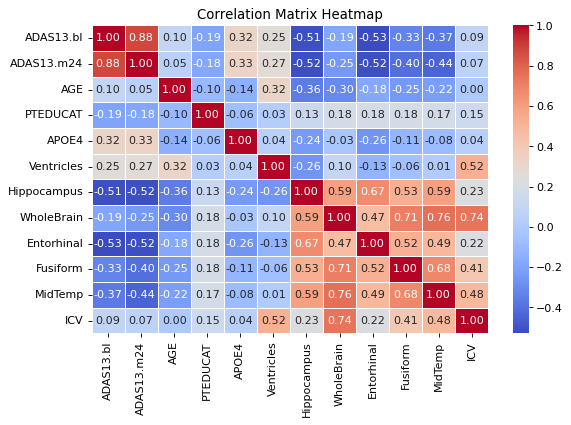

In [166]:
corr = df.select_dtypes(include=['number']).corr() 
#We are calculating the correlation between the numeric columns of our dataset
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5) 
#We are plotting the heatmap of the correlation with following parameters
plt.title("Correlation Matrix Heatmap") #setting the title of the heatmap
plt.show()

The analysis of feature correlations highlights key predictors of cognitive decline over a 24-month period. The **strongest correlation** was observed with **ADAS13.bl (R = +0.876)**, indicating that baseline cognitive scores are the most reliable predictor of future decline. Among neuroimaging features, **hippocampal volume (R = -0.516)** and **entorhinal cortex size (R = -0.515)** showed strong negative correlations, reinforcing their role in memory and cognitive function. Similarly, **fusiform (R = -0.404)** and **midtemporal volume (R = -0.442)** exhibited negative correlations, supporting the well-established link between brain atrophy and cognitive impairment.  

**Moderate correlations** were found with **ventricular volume (R = +0.267)**, where larger ventricles were associated with greater cognitive decline, consistent with neurodegeneration in Alzheimer's disease. The presence of the **APOE4 gene (R = +0.333)** also showed a moderate positive correlation, confirming its role as a genetic risk factor for Alzheimer's.  

Some features displayed **weak correlations** with cognitive decline. **Age (R = +0.053)** had a minor positive correlation, suggesting that while ageing is a risk factor, it does not directly predict the rate of cognitive decline. **Education (R = -0.183)** exhibited a slight protective effect, with higher education levels linked to slower cognitive deterioration, though the relationship was not strong. Lastly, **intracranial volume (ICV, R = +0.065)** showed minimal correlation, likely because it reflects overall brain size rather than specific patterns of neurodegeneration.  

These findings highlight the importance of baseline cognitive scores and neuroimaging features in predicting cognitive decline, while factors like education and genetics may contribute but with a lesser impact.

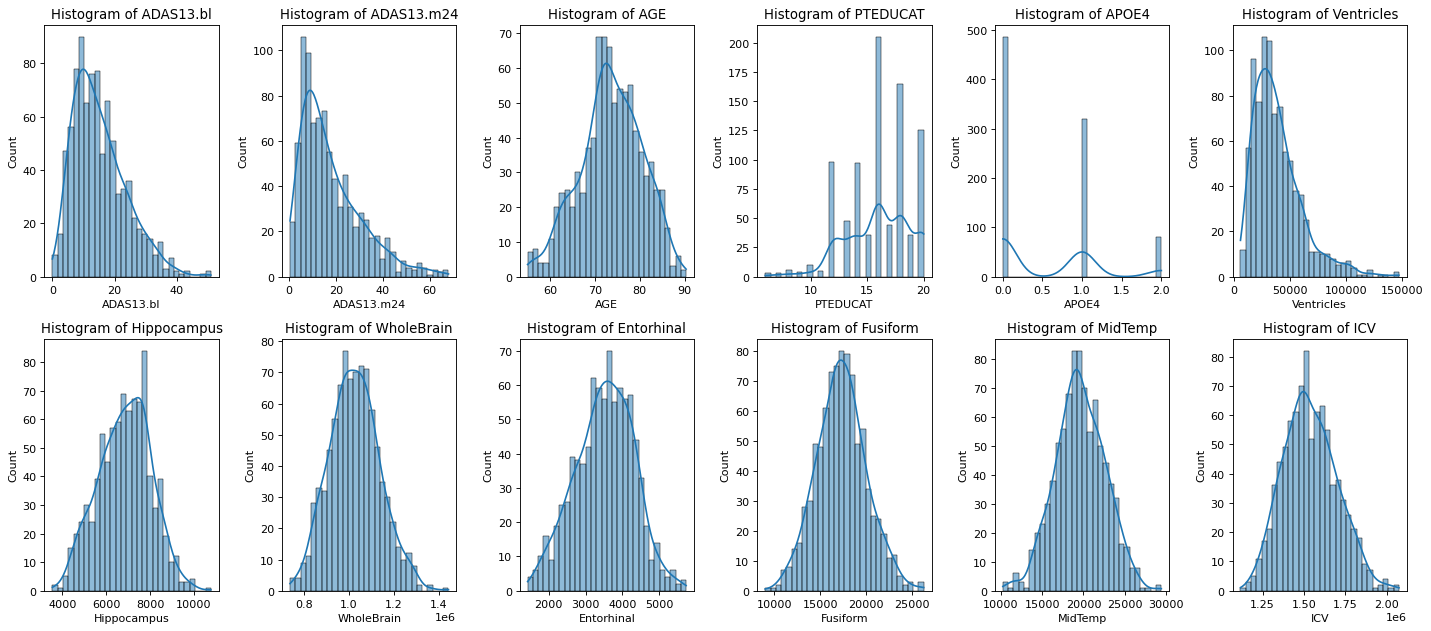

In [167]:
# We are selecting numeric columns from our dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  

# Define the number of subplots per row
num_cols = 6  

# We are calculating the number of rows needed based on the total number of numeric columns
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  

# We are creating subplots with the calculated number of rows and 6 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows)) 

# We flatten the axes array to iterate over each subplot easily
axes = axes.flatten()  

# Loop over each numeric column and plot its histogram with a KDE overlay
for i, col in enumerate(numerical_features):
     # We are plotting the histogram with a kernel density estimate for each numeric column
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30) 
    # Setting the title of each subplot to the corresponding column name
    axes[i].set_title(f'Histogram of {col}')  
for j in range(i + 1, len(axes)):
    # We are removing extra subplots that do not have any data to display
    fig.delaxes(axes[j])  

plt.tight_layout()  # Adjust layout spacing for better visualization
plt.show()  # Display the complete figure with all histograms

Our target variable, **ADAS13.m24**, is right-skewed, suggesting potential **heteroscedasticity**. Initially, we will fit the model without transformations and assess residual plots to determine if adjustments are necessary.  

A **log transformation** could help address skewness, but it significantly scales values, which may reduce prediction accuracy when reversing the transformation. Instead, a **square root transformation** offers a more balanced approach, stabilising variance while preserving predictive power.  

Most features, including **AGE** and brain-related metrics (except **Ventricles**), follow a normal distribution, meaning transformations are unlikely to have a major impact. While residual plots may not strongly indicate heteroscedasticity, we will test transformations and evaluate performance metrics (**R², MSE, RMSE**) to assess their effect.  

Since **ADAS13.m24** shows right skewness, meaning some patients experience significantly higher cognitive decline, we found that a **square root transformation** effectively normalised variance while maintaining model accuracy.

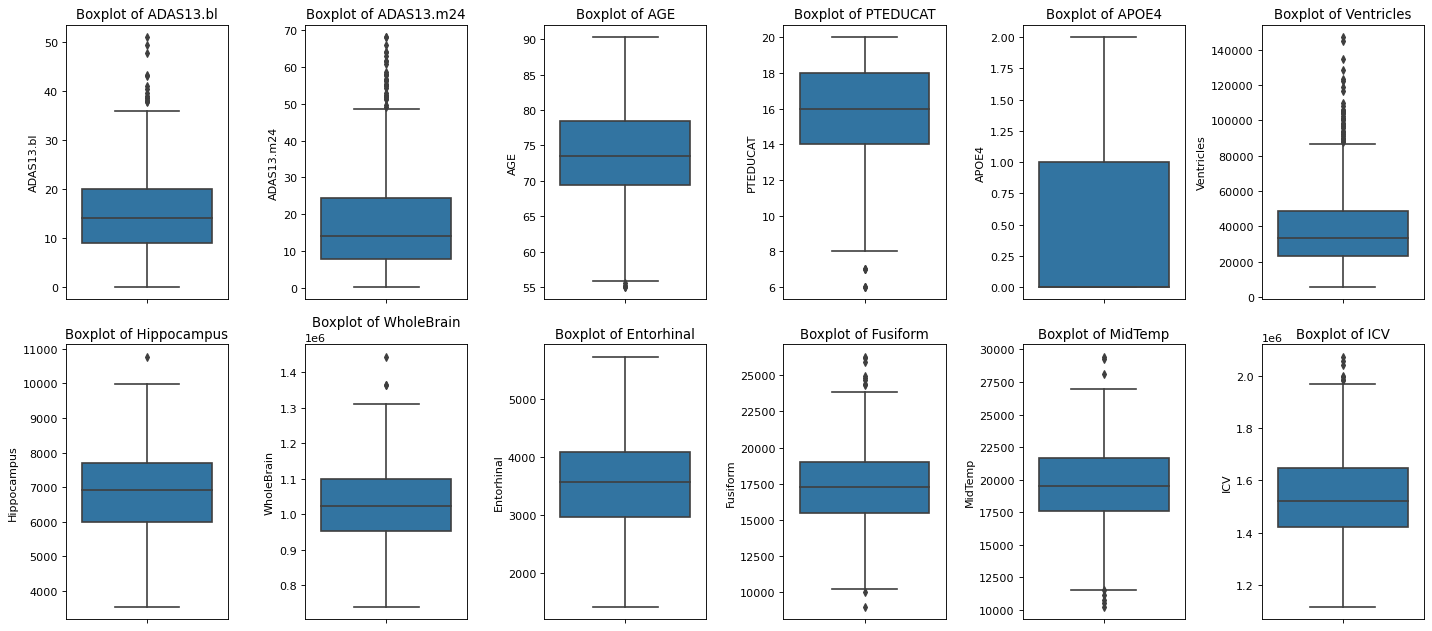

In [168]:
# We create a grid of subplots for our boxplots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
# We flatten the axes array so we can easily loop through each subplot.
axes = axes.flatten()

# We loop through each numerical feature and plot a boxplot.
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i])  # We plot a boxplot for the current numerical feature.
    axes[i].set_title(f'Boxplot of {col}')  # We set a title for this subplot.

# We remove any extra subplots that are not needed.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # We adjust the layout for a neat appearance.
plt.show()  # We now display the boxplots.

The dataset contains extreme values in brain-related features such as Ventricles, Hippocampus, and WholeBrain, as well as in ADAS13 measures. These values suggest the presence of outliers or unusual observations. However, in biological data, such variations often reflect genuine differences in human anatomy and cognitive function rather than data errors. While standard approaches like standardization or capping extreme values can help reduce their influence on predictive models, we acknowledge that in this context, these outliers may provide meaningful clinical insights, especially in cases of advanced cognitive decline. Therefore, we have chosen not to remove or modify these extreme values, as they represent real variations in the population. Additionally, since we will be applying log and square root transformations to the target variable and potentially some features, these transformations will naturally reduce the impact of extreme values by compressing the scale of higher values and stabilizing variance.

In [169]:
# we are extracting columns with categorical data types
categorical_columns = df.select_dtypes(include=['object']).columns
#for col in categorical_columns:
 #   print(f"\nColumn: {col}")
 #   print(df[col].value_counts().to_string())

### Categorical Feature Distributions

- **DX.bl**: CN (303), LMCI (299), EMCI (170), AD (113)
- **PTGENDER**: Male (497), Female (388)
- **PTETHCAT**: Not Hisp/Latino (861), Hisp/Latino (20), Unknown (4)
- **PTRACCAT**: White (829), Black (31), Asian (13), More than one (8), 
Amer. Indian/Alaskan (2), Hawaiian/Other PI (1), Unknown (1)
- **PTMARRY**: Married (683), Widowed (93), Divorced (74), Never Married (30), Unknown (5)


## Feature Selection Based on Distribution Analysis

We observed that, except for DX.bl, the distribution of other categorical variables is highly skewed toward a single dominant value. This suggests that our model will primarily rely on these overrepresented categories, making them redundant in terms of predictive power.

### Reasons for Dropping These Features:
- **Lack of Variability**: Features with minimal variation do not contribute meaningful information for distinguishing between different outcomes.
- **Potential Bias**: If a feature is dominated by a single group (e.g., race or ethnicity), the model may fail to generalize to underrepresented groups.
- **Redundant Information**: Features with highly imbalanced distributions do not provide additional predictive power and may unnecessarily increase model complexity.

### Retaining DX.bl
- **Balanced Distribution**: Unlike other categorical variables, DX.bl has a more even spread across categories, making it a useful predictor for modeling Alzheimer's disease progression.
- **Clinical Relevance**: Initial diagnosis is a key factor in determining cognitive decline, so retaining DX.bl ensures that this critical information is incorporated into the model.

Since DX.bl is **ordinal in nature** (i.e., it follows a meaningful order), we will later apply **logical encoding** to convert it into a numerical format suitable for machine learning models. Logical encoding is preferred over **one-hot encoding** because it preserves the natural order of the categories, ensuring that the model can recognize the progression from one stage of cognitive decline to another.


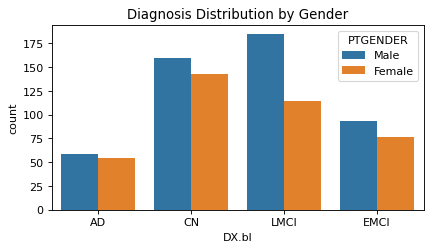

In [170]:
plt.figure(figsize=(6, 3))  
sns.countplot(x=df['DX.bl'], hue=df['PTGENDER'])
plt.title("Diagnosis Distribution by Gender")
plt.show()

We initially suspected that gender might correlate with DX.bl (diagnosis at baseline), which is crucial for our model. Examining the distribution reveals that a higher number of males are at the LMCI stage, suggesting that men could be at a greater risk of progression to AD. However, because this imbalance isn’t fully reflected in our dataset—likely due to how missing values were removed—some female candidates at the LMCI stage or male candidates at the AD stage may have been disproportionately excluded.

With this in mind, we included gender as a feature and one-hot encoded it. Surprisingly, the resulting model showed a slight decline in performance (R^2, MSE, RMSE). Consequently, we decided to drop gender from the final model. Key metrics for the model that included gender (using a square root transformation, PCA, and polynomial regression) were as follows:
- sqrt_with_pca_polynomial: R^2 = 0.811, MSE = 27.857, RMSE = 5.278, 
- Best Params: {'poly__degree': 2}

The other significant values associated when gender was used would be provided in the later section.

## Conclusion - EDA and Feature Engineering

Some aspects of **Exploratory Data Analysis (EDA)** and **Feature Engineering** will be further detailed when implementing the code, but key decisions made during preprocessing are outlined here.

To handle missing values, we chose to drop incomplete cases rather than impute them. Many missing data points were in columns with high standard deviations, meaning simple imputation (e.g., mean or median) could introduce misleading patterns. Additionally, missing values in neuroimaging and clinical data were likely not random and could correlate with cognitive decline. Imputing them might have introduced bias, distorting real patterns in the dataset. Removing these cases also simplified the preprocessing pipeline, making the model more interpretable.

For categorical variables, we applied **ordinal encoding** to `DX.bl`, which follows the natural progression of cognitive decline (`CN < EMCI < LMCI < AD`). Other categorical features such as **PTGENDER, PTETHCAT, PTRACCAT, and PTMARRY** were removed due to highly skewed distributions, where most values fell into a single category, making them uninformative.

Numerical features were **standardised using Z-score normalisation** via `StandardScaler()`, ensuring that all features had a mean of zero and a standard deviation of one. This step balanced differences in scale across variables, such as brain volume measurements and demographic data, while also addressing multicollinearity to improve model stability.

To reduce redundancy in neuroimaging features, we applied **Principal Component Analysis (PCA)** to highly correlated variables: **Hippocampus, Entorhinal, MidTemp, Fusiform, and WholeBrain**. This transformation resulted in a single principal component, **"brain_shrink,"** which captured shared variance linked to brain atrophy. However, **Ventricles** and **ICV** were retained separately, as they had unique correlations with cognitive decline that would be lost if merged through PCA.

Through this feature engineering process, we ensured our final dataset is both **structured and interpretable**. By carefully handling missing data, encoding categorical variables effectively, standardising numerical features, and reducing dimensionality, we created a dataset that balances predictive performance with clinical relevance.

# Model Fitting and Tuning

### Model Performance Summary - Baseline & Final

#### Baseline Model
The initial model, a **Linear Regression**, achieved an R² of 0.794 with an MSE of 30.472 and RMSE of 5.520. While this provided a reasonable prediction baseline, it lacked the flexibility to fully capture the complexity of cognitive decline patterns.

#### Final Model
The **Polynomial Regression (Degree=2)** model demonstrated improved performance with an **R² of 0.811**, **MSE of 27.857**, and **RMSE of 5.278**. This improvement suggests that incorporating polynomial terms better captured the non-linear trends in the data, leading to more accurate predictions. Additionally, the use of **PCA for feature selection** helped reduce redundancy while preserving key information.

The **final model** will be explored in more depth in the following sections, with further discussion on its implications and predictive reliability.

## **Detailed look at the Final model formulation**

In [171]:
# =============================================================================
# 1. Define Feature Groups
# =============================================================================
# We are selecting numeric features such as ADAS13.bl, AGE, PTEDUCAT, Ventricles, ICV, and APOE4.
# These features represent demographics and other measurements used in our analysis.
numeric_features = ['ADAS13.bl', 'AGE', 'PTEDUCAT', 'Ventricles', 'ICV', 'APOE4']
# We are selecting brain-related features like Hippocampus, Entorhinal, MidTemp, Fusiform, and WholeBrain.
# These features, which we refer to as "brain_shrink", will be combined (e.g., using PCA) to reduce redundancy.
brain_features = ['Hippocampus', 'Entorhinal', 'MidTemp', 'Fusiform', 'WholeBrain']
# We are selecting the diagnosis feature (DX.bl) which is a categorical variable with a natural order (e.g., CN, EMCI, LMCI, AD).
diagnosis_feature = ['DX.bl']

### Preprocessing Pipeline Start
The dataset consists of three main types of features: **numeric features, brain imaging features, and categorical features**. Each type requires a tailored preprocessing approach to ensure the data is well-structured and ready for modelling.
#### Numeric Features  
These include key demographic and clinical measurements that help in understanding cognitive decline. Some of the most important numeric variables are:  
- **ADAS13.bl** – Baseline cognitive score  
- **AGE** – Patient’s age  
- **PTEDUCAT** – Years of education  
- **Ventricles, ICV, APOE4** – Biological markers  

Since these features come from different scales, they are **standardised using StandardScaler()** to ensure that no single variable dominates the model due to its magnitude.
#### Brain Imaging Features  
Brain imaging features are **highly correlated**, meaning there is a risk of redundancy in the data. To address this, **Principal Component Analysis (PCA)** is used for dimensionality reduction. This transformation compresses the following five variables into a single principal component:  
- **Hippocampus, Entorhinal, MidTemp, Fusiform, WholeBrain**  

The newly created **"brain_shrink"** feature captures the most significant patterns of brain atrophy while reducing complexity. This helps improve model efficiency without losing critical information.
#### Categorical Feature  
The dataset includes a categorical feature that requires special handling:  
- **DX.bl** – Diagnosis category, which follows an **ordinal structure** representing the progression of cognitive decline (**CN < EMCI < LMCI < AD**).  

To preserve this natural order, **Ordinal Encoding** is applied. This ensures that the model correctly interprets the relationship between different stages of cognitive impairment, allowing for more meaningful predictions.

In [172]:
# =============================================================================
# 2. Build Preprocessing Pipelines
# =============================================================================
# We create a pipeline for the brain features to first scale them using StandardScaler.
# Then, we apply PCA to reduce these highly correlated brain features into one principal component,
# which we refer to as "brain_shrink". This helps reduce redundancy while retaining most of the variance.
brain_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1)) ])

# Next, we create a pipeline for the other numeric features.
# Here, we simply scale the features to have zero mean and unit variance.
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()) ])

# Then, we create a pipeline for the diagnosis feature.
# Since DX.bl is an ordinal categorical variable, we use OrdinalEncoder to convert it into numeric values
# that preserve the inherent order (CN < EMCI < LMCI < AD).
diagnosis_pipeline = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories=[['CN', 'EMCI', 'LMCI', 'AD']])) ])

## Preprocessing - Feature and PCA pipeline

To ensure consistency and improve efficiency, a structured preprocessing pipeline was applied to the dataset before modelling. The first step involved handling **brain imaging features**, where **Principal Component Analysis (PCA)** was used to address multicollinearity among five highly correlated variables. Before applying PCA, the features were **standardised using StandardScaler()** to ensure uniform scaling. A single principal component, **brain_shrink**, was extracted (`n_components=1`) to retain key information while reducing dimensionality.

For **numeric features**, standardisation was again performed using **StandardScaler()**. This step ensures that all features contribute equally to the model, particularly in distance-based calculations, preventing any single variable from dominating due to differences in scale.

Categorical features, such as **diagnosis at baseline (DX.bl)**, were processed using **ordinal encoding**. Since the diagnosis categories follow a natural progression (**CN < EMCI < LMCI < AD**), ordinal encoding preserves this order in a meaningful way. This approach ensures that the model captures the increasing severity of cognitive decline while maintaining interpretability.

By implementing these preprocessing steps, the dataset was transformed into a more structured and model-ready format, allowing for better performance and reliability in predictions.


In [173]:
# Combine all pipelines using a ColumnTransformer.
# This applies:
#   - The brain_pipeline to brain features,
#   - The numeric_pipeline to numeric features,
#   - The diagnosis_pipeline to the diagnosis feature.
preprocessor = ColumnTransformer(transformers=[
    ('brain', brain_pipeline, brain_features),
    ('numeric', numeric_pipeline, numeric_features),
    ('diagnosis', diagnosis_pipeline, diagnosis_feature) ])

4. Column Transformer: 
- A `ColumnTransformer` applies these transformations **in parallel**, ensuring that each feature type is preprocessed appropriately before model training.

In [174]:
# =============================================================================
# 3. Define Target Transformation (Square Root)
# =============================================================================
# We use a FunctionTransformer to apply a square root transformation to the target variable.
# This transformation can help stabilize variance (addressing heteroscedasticity).
# The inverse transformation (squaring) is used to bring predictions back to the original scale.
target_transformer = FunctionTransformer(func=np.sqrt, inverse_func=lambda x: np.square(x), check_inverse=False)

## Polynomial Regression Pipeline - Start

In [175]:
# =============================================================================
# 4. Build the Polynomial Regression Pipeline
# =============================================================================
# The model pipeline consists of:
#   a. Preprocessing: applying the ColumnTransformer (which includes our brain_shrink PCA step).
#   b. Polynomial feature expansion: creating polynomial terms for nonlinear relationships.
#   c. Linear regression: fitting a simple linear regression model on the expanded features.
# We then wrap the entire pipeline in a TransformedTargetRegressor to apply the square root transformation
# to the target variable during training and use the inverse (squaring) during prediction.

In [176]:
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(include_bias=False)),  # Expand features into polynomial terms.
    ('linear', LinearRegression())                     # Fit a linear model on these features.
])
# Wrap the polynomial pipeline with TransformedTargetRegressor for target transformation.
model_with_target_transform = TransformedTargetRegressor(regressor=poly_pipeline,
                                                         func=target_transformer.transform,
                                                         inverse_func=target_transformer.inverse_transform,
                                                         check_inverse=False)


## Data preparation - Start

In [177]:
# =============================================================================
# 5. Prepare Data
# =============================================================================
# Combine all feature lists into a single list.
all_features = numeric_features + brain_features + diagnosis_feature
target = 'ADAS13.m24'

# Extract the feature matrix X and the target vector y.
X = df[all_features]
y = df[target]

# Split the data into training and testing sets (80/20 split).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


- We are dividing the data into training and testing our target feature is ADAS13.m24 it refers to the values which we are predicting

- All feature is the combination of all numeric features, features for which we had used PCA and features which were encoded (DX.bl)

## GridSearchCV - start

In [178]:
# =============================================================================
# 6. Set Up GridSearchCV for Polynomial Degree Tuning
# =============================================================================
# We want to tune the degree of the polynomial features.
# Since our entire model is wrapped in TransformedTargetRegressor, the grid key uses "regressor__poly__degree".
param_grid = {
    'regressor__poly__degree': [1, 2, 3, 4]  # Test polynomial degrees 1 through 4.
}

# Set up GridSearchCV:
# - Using 3-fold cross-validation for faster tuning.
# - Scoring based on negative MSE.
grid_search = GridSearchCV(estimator=model_with_target_transform,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# Print best parameters found during tuning.
print("Best parameters (polynomial degree):", grid_search.best_params_)


Best parameters (polynomial degree): {'regressor__poly__degree': 2}


Hyperparameter tuning using **GridSearchCV** is an essential step in optimising the model’s performance by systematically searching for the best configuration. One key aspect of this process is selecting the optimal polynomial degree. Increasing the polynomial degree allows the model to capture more complex, nonlinear relationships within the data. However, if the degree is too high, the model may start to overfit, meaning it learns noise rather than meaningful patterns. To prevent this, **GridSearchCV** is used to test polynomial degrees from 1 to 4 and identify the best balance between flexibility and generalisability.

To ensure reliable performance, a **3-Fold Cross-Validation** strategy is applied. This technique divides the dataset into three subsets, where the model is trained on two subsets and tested on the remaining one, repeating the process three times. This method helps to detect potential issues like overfitting or underfitting by assessing how well the model generalises across different portions of the data.

In practice, **GridSearchCV** is configured to select the best polynomial degree based on **negative Mean Squared Error (MSE)**, ensuring that the final model minimises prediction errors. The model with the lowest validation error is chosen, striking a balance between capturing meaningful patterns and maintaining robustness against overfitting.

## Model Evaluation

In [179]:

# =============================================================================
# 7. Evaluate the Best Model
# =============================================================================
# Retrieve the best estimator from GridSearchCV.
best_model = grid_search.best_estimator_

# Make predictions on the test set.
y_pred = best_model.predict(X_test)

# Calculate performance metrics.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Polynomial Regression (with sqrt target transformation): R^2 = {r2:.3f}, MSE = {mse:.3f}, RMSE = {rmse:.3f}")

Polynomial Regression (with sqrt target transformation): R^2 = 0.811, MSE = 27.857, RMSE = 5.278



- **Polynomial Regression (degree=2) with PCA & Square Root Transformation outperformed other models.**
- **Brain shrinkage via PCA reduced multicollinearity without loss of predictive accuracy.**
- **Standardization and encoding ensured that all features contributed effectively to model training.**

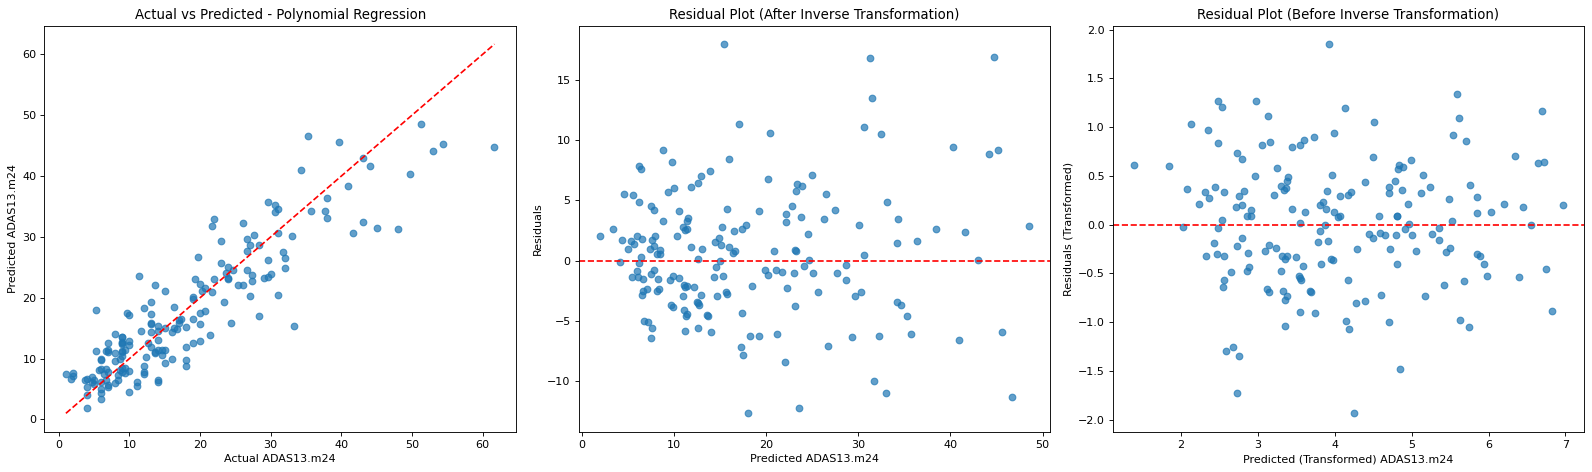

In [180]:
# Create a figure with 1 row and 3 columns for subplots, with a specified figure size.
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# -----------------------------------------------------------------------------
# Plot 1: Actual vs. Predicted Values (Final Predictions)
# -----------------------------------------------------------------------------
# Here, we plot the actual values vs. the predicted values from our model.
axes[0].scatter(y_test, y_pred, alpha=0.7)  # We plot the scatter plot for actual vs predicted.
# We add a red dashed reference line that represents the ideal predictions.
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_xlabel("Actual ADAS13.m24")
axes[0].set_ylabel("Predicted ADAS13.m24")
axes[0].set_title("Actual vs Predicted - Polynomial Regression")

# -----------------------------------------------------------------------------
# Plot 2: Residuals on the Final (Inverse-Transformed) Scale
# -----------------------------------------------------------------------------
# We calculate the residuals by subtracting the predicted values from the actual values.
residuals_final = y_test - y_pred  
# Now, we plot these residuals against the predicted values.
axes[1].scatter(y_pred, residuals_final, alpha=0.7)  # We plot the residuals for each predicted value.
# We add a horizontal red dashed line at zero to show where the predictions are perfect.
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted ADAS13.m24")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot (After Inverse Transformation)")

# -----------------------------------------------------------------------------
# Plot 3: Residuals in the Transformed Domain (Before Inverse Transformation)
# -----------------------------------------------------------------------------
# We check if our best model is using a TransformedTargetRegressor.
if best_model.__class__.__name__ == 'TransformedTargetRegressor':
    # We get predictions from the underlying regressor in the transformed space.
    y_pred_trans = best_model.regressor_.predict(X_test)
    # We apply the forward transformation to the actual target values so that they are on the same scale.
    y_test_trans = best_model.func(y_test)
    # We compute the residuals in the transformed space.
    residuals_trans = y_test_trans - y_pred_trans

    # We plot the transformed predictions vs. the residuals in the transformed domain.
    axes[2].scatter(y_pred_trans, residuals_trans, alpha=0.7)
    # We add a horizontal line at zero to indicate perfect predictions.
    axes[2].axhline(0, color='red', linestyle='--')
    axes[2].set_xlabel("Predicted (Transformed) ADAS13.m24")
    axes[2].set_ylabel("Residuals (Transformed)")
    axes[2].set_title("Residual Plot (Before Inverse Transformation)")
else:
    # If the model is not a TransformedTargetRegressor, we remove the third subplot.
    fig.delaxes(axes[2])

# We adjust the layout so that the subplots do not overlap.
plt.tight_layout()
# Finally, we display the combined plots.
plt.show()


### **Actual vs. Predicted Scatter Plot**  

The **"Actual vs. Predicted" scatter plot** helps assess the model’s accuracy in predicting cognitive scores. Ideally, points should be close to the red dashed line, indicating a perfect match between predictions and actual values. For moderate scores (around **10 to 30**), the model performs well, showing strong alignment between predictions and observed values, suggesting it effectively captures trends in this range.  

However, at **higher ADAS13.m24 values** (above **40 or 50**), the predictions become less reliable, deviating significantly from actual scores. These outliers likely correspond to individuals with severe cognitive decline, a group that is underrepresented in the dataset. The model struggles with these cases due to limited training data, leading to weaker generalisation for extreme values.  

While the **polynomial regression model** works well for most individuals, it faces challenges in predicting extreme cases. Addressing this may require alternative modelling approaches or transformations to improve accuracy at higher values, though any changes must preserve interpretability and clinical relevance.  

### **Residual Plot Analysis**  

**Residual plots** help check if the model satisfies **homoscedasticity**, meaning prediction errors are evenly spread across all values. When this assumption is violated—seen as residuals becoming more dispersed with increasing predictions—it indicates **heteroscedasticity**, often linked to outliers.  

To tackle this, we applied a **square root transformation** to the target variable (**ADAS13.m24**) to reduce skewness and stabilise variance. Residuals were examined at two stages: first in the transformed (square root) domain and then after reversing the transformation to the original scale.  

In the square root domain, errors were more evenly distributed around zero, indicating the transformation effectively minimised the impact of extreme values, improving model stability. However, once predictions were mapped back to the original scale, variability increased at higher values of **ADAS13.m24**. This is common in clinical data, where severe cases naturally show greater variability. While the transformation improved stability during training, it could not fully eliminate **heteroscedasticity** once predictions were reverted to the clinical scale.  

Transforming the target variable improves alignment with statistical assumptions and enhances model performance, but it does not fully resolve variability in real-world applications. To refine predictions further, alternative techniques like **weighted regression** or **non-linear modelling** could be explored, particularly when handling extreme cases or clinical outliers.

# Table of shortlisted Models and Metrics

| Model         | PCA (Encoding) | Transform |   R²   |   MSE   |  RMSE  | Best Params |
|---------------|:-------------:|:---------:|-------:|--------:|-------:|:-----------:|
| **Polynomial** | ORD           | Sqrt      | 0.811  | 27.857  | 5.278  | deg=2       |
| **Ridge**      | no            | Sqrt      | 0.804  | 29.032  | 5.388  | α=26.0      |
| **Polynomial** | 1HEC + ORD    | None      | 0.802  | 29.306  | 5.414  | deg=2       |
| **Polynomial** | 1HEC + ORD    | Log       | 0.744  | 37.886  | 6.155  | deg=2       |
| **Lasso**      | no            | None      | 0.793  | 30.593  | 5.531  | α=0.1       |
| **Ridge**      | ORD           | None      | 0.795  | 30.290  | 5.504  | α=2.3       |
| **Linear**     | ORD           | Sqrt      | 0.798  | 29.861  | 5.465  | None        |
| **Lasso**      | 1HEC + ORD    | Sqrt      | 0.779  | 32.605  | 5.710  | α=0.1       |
| **Decision.T** | no            | None      | 0.692  | 45.580  | 6.751  | depth=3     |
| **Lasso**      | no            | Log       | 0.654  | 51.056  | 7.145  | α=0.1       |

A total of **54 models** were evaluated. Only a select few are shown here due to space constraints. Furthermore those shortlisted models were ran on gridCV and their optimal values are shown above.

### Notes
1. **Polynomial** with **sqrt** transform and **PCA (ORD)** achieves the highest R² (≈ 0.811).
2. **Decision.T** underperforms relative to regression-based approaches.
3. **Log** transform generally yields higher errors (MSE, RMSE) than **None** or **Sqrt**.
4. **Ridge** and **Lasso** help more than basic **Linear**, yet still often lag behind **Polynomial**.

ORD -> Ordinal/logical encoding
1HEC -> One hot encoding


# Discussion & Conclusions 

## **Final Model Overview**  

Our model predicts an individual’s **ADAS-Cog 13 score** at a **24-month follow-up**, using baseline cognitive, demographic, genetic, and neuroimaging data. **Polynomial Regression (degree=2)** outperformed traditional linear regression by better capturing complex relationships linked to cognitive decline. The strongest predictor was the **baseline cognitive score (ADAS13.bl)**, followed by **neuroimaging features** such as hippocampal volume and entorhinal cortex size, which align with established Alzheimer’s research. The **APOE4 genotype**, a major genetic risk factor, also contributed significantly, while **age and education level** showed moderate correlations, with higher education appearing to have a protective effect.  

## **Implications & Predictive Performance**  

While not perfect, the model improves cognitive decline prediction over a baseline regression. It can help identify high-risk individuals for **early intervention** and **clinical trials**, inform caregivers and healthcare providers about at-risk cases, and assist in resource allocation for cognitive health management. However, it should be used alongside clinical assessments rather than as a standalone diagnostic tool.  

## **Limitations & Considerations**  

The dataset was a subset of ADNI and requires external validation for broader applicability. The study may not fully represent diverse populations due to limited inclusion of ethnicity and socio-economic factors. Additionally, while the model identifies strong correlations, it does not imply causation. Cognitive decline is influenced by multiple unpredictable factors, such as lifestyle, medical interventions, and genetics, which were not fully accounted for in this analysis.  

## **Recommendations & Next Steps**  

For researchers and clinicians, further investigation into modifiable risk factors such as diet, exercise, and cognitive training could improve intervention strategies, while incorporating longitudinal lifestyle data may enhance predictive accuracy. Health policymakers and charities could focus on early detection strategies, increased funding for brain imaging and cognitive assessments, and public awareness campaigns on early screening. Individuals and caregivers can benefit from adopting healthy lifestyle habits and seeking early screening to manage symptoms more effectively.  

## **Future Enhancements**  

Further improvements could include applying robust regression methods or alternative transformations to reduce the impact of outliers. Multi-timepoint analyses incorporating repeated cognitive and neuroimaging assessments could enhance predictive accuracy. Future research may also explore deep learning techniques and multi-modal data integration to refine predictions and improve clinical applicability.  

Although not a perfect predictor, this model provides valuable insights into cognitive decline. With further refinements, predictive models could support **early detection, intervention planning, and improved quality of life** for those at risk of Alzheimer’s disease.

# Generative AI statement

We used ChatGPT to:
- Gather insights on PCA and brain regions.
- Convert draft text and code blocks into structured Markdown.
- Suggest improvements for code organization.

Grammarly and Perplexity AI were used only for:
- Spell-checking and minor writing clarifications mainly associated with grammar.
- Finding general references and readings on machine learning approaches for alzeihmer detection.

No private ADNI data was shared with these tools.


In [181]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf updated_project1.ipynb

[NbConvertApp] Converting notebook updated_project1.ipynb to pdf
[NbConvertApp] Writing 460125 bytes to updated_project1.pdf
